In [2]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from google.colab import files

import matplotlib.pyplot as plt
plt.style.use('seaborn-white')


<ipython-input-2-bd2f45255cf5>:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


#이미지 이진화 (Image Thesholding)

##기본 임계 처리
이진화 : 영상을 흑/백으로 분류하여 처리하는 것

기준이 되는 임계값을 어떻게 결정할 것인지가 중요한 문제!

임계값보다 크면 백, 작으면 흑이 되는데,
기본 임계처리는 사용자가 고정된 임계값을 결정하고 그 결과를 보여주는 단순한 형태

기본적으로 이미지의 segmenting의 가장 간단한 방법

cv2.threshold()

Parameters

src : input image로 single-channel 이미지.(grayscale 이미지)

thresh : 임계값

maxval : 임계값을 넘었을 때 적용할 value

type : thresholding type


thresholding type

cv2.THRESH_BINARY

src(x, y) > thresh 일 때, maxval

그 외, 0

cv2.THRESH_BINARY_INV

src(x, y) > thresh 일 때, 0

그 외, maxval

cv2.THRESH_TRUNC

src(x, y) > thresh 일 때, thresh

그 외, src(x, y)

cv2.THRESH_TOZERO

src(x, y) > thresh 일 때, src(x, y)

그 외, 0

cv2.THRESH_TOZERO_INV

src(x, y) > thresh 일 때, 0

그 외, src(x, y)


In [3]:
files.upload()

Saving letters.jpg to letters.jpg


{'letters.jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00\x84\x00\x05\x05\x05\x05\x05\x05\x05\x06\x06\x05\x08\x08\x07\x08\x08\x0b\n\t\t\n\x0b\x11\x0c\r\x0c\r\x0c\x11\x1a\x10\x13\x10\x10\x13\x10\x1a\x17\x1b\x16\x15\x16\x1b\x17) \x1c\x1c )/\'%\'/9339GDG]]}\x01\x05\x05\x05\x05\x05\x05\x05\x06\x06\x05\x08\x08\x07\x08\x08\x0b\n\t\t\n\x0b\x11\x0c\r\x0c\r\x0c\x11\x1a\x10\x13\x10\x10\x13\x10\x1a\x17\x1b\x16\x15\x16\x1b\x17) \x1c\x1c )/\'%\'/9339GDG]]}\xff\xc2\x00\x11\x08\x01\xaa\x02\x80\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x005\x00\x00\x02\x02\x03\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x06\x05\x07\x03\x04\x08\x02\x01\x01\x00\x01\x05\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x05\x00\x02\x03\x04\x06\x01\x07\xff\xda\x00\x0c\x03\x01\x00\x02\x10\x03\x10\x00\x00\x00\xbc\xed5VxnRc3\xb7U!\x1fn\xeb\xa9\x9fqe$\xa0\xb0\xafg d\x8b\xb2\xed\xfbU\xd3\xd0\x80\x96\xd6\x8f\x9d\x8e\x12\xdb\xf9#\x89W\x03\x89j\xe6\xb1\x06\xa2\xd16\x9dc\xa5\x90

In [9]:
img = cv2.imread('letters.jpg',0)


In [10]:
img.shape

(426, 640)

In [11]:
ret, thresh1 = cv2.threshold(img,128,255,cv2.THRESH_BINARY)
ret, thresh2 = cv2.threshold(img,128,255,cv2.THRESH_BINARY_INV)
ret, thresh3 = cv2.threshold(img,128,255,cv2.THRESH_TRUNC)
ret, thresh4 = cv2.threshold(img,128,255,cv2.THRESH_TOZERO)
ret, thresh5 = cv2.threshold(img,128,255,cv2.THRESH_TOZERO_INV)

In [12]:
titles = ['Original','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img,thresh1, thresh2, thresh3, thresh4, thresh5]

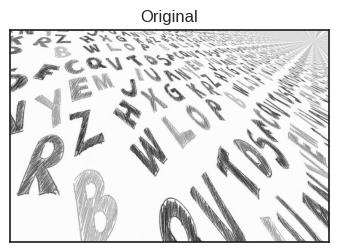

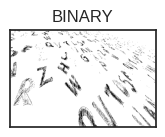

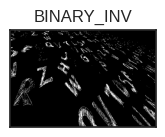

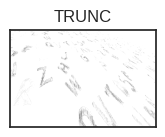

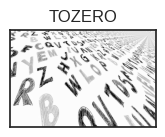

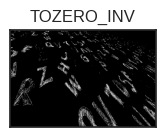

In [13]:
plt.figure(figsize = (14,10))
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.imshow(images[i],'gray')
  plt.title(titles[i])
  plt.xticks([]),plt.yticks([])

  plt.show()

In [14]:
files.upload()

Saving snow.jpg to snow.jpg


{'snow.jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00\x84\x00\x05\x05\x05\x05\x05\x05\x05\x06\x06\x05\x08\x08\x07\x08\x08\x0b\n\t\t\n\x0b\x11\x0c\r\x0c\r\x0c\x11\x1a\x10\x13\x10\x10\x13\x10\x1a\x17\x1b\x16\x15\x16\x1b\x17) \x1c\x1c )/\'%\'/9339GDG]]}\x01\x05\x05\x05\x05\x05\x05\x05\x06\x06\x05\x08\x08\x07\x08\x08\x0b\n\t\t\n\x0b\x11\x0c\r\x0c\r\x0c\x11\x1a\x10\x13\x10\x10\x13\x10\x1a\x17\x1b\x16\x15\x16\x1b\x17) \x1c\x1c )/\'%\'/9339GDG]]}\xff\xc2\x00\x11\x08\x01\xaa\x02\x80\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x004\x00\x00\x01\x05\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x04\x02\x03\x05\x06\x07\x01\x00\x08\t\x01\x00\x03\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\xff\xda\x00\x0c\x03\x01\x00\x02\x10\x03\x10\x00\x00\x00\xcb$\xe2\xf6\x9fW\xce\xa83\xbaf\xb9\xdd\x1b\xe8o\x9fv\x80;\xe7\xaf\xa1\xfenT\xc4s\xc3m\x98\xe1\xbe.Td\x04\x84|\xdb+\xf7U\xba\xe3k\x82n\xdbV\xb2\xcbz.j90a\xa4#\xca\xa9\xc4Xkm%

In [15]:
img2  = cv2.imread('snow.jpg',0)
img.shape

(426, 640)

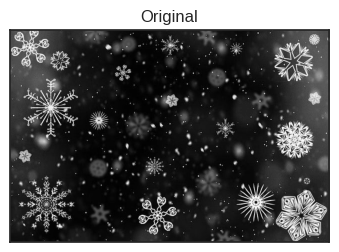

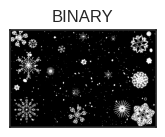

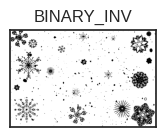

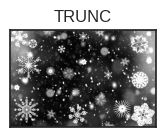

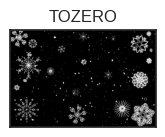

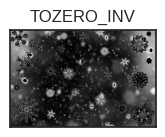

In [16]:
ret, thresh1 = cv2.threshold(img2,128,255,cv2.THRESH_BINARY)
ret, thresh2 = cv2.threshold(img2,128,255,cv2.THRESH_BINARY_INV)
ret, thresh3 = cv2.threshold(img2,128,255,cv2.THRESH_TRUNC)
ret, thresh4 = cv2.threshold(img2,128,255,cv2.THRESH_TOZERO)
ret, thresh5 = cv2.threshold(img2,128,255,cv2.THRESH_TOZERO_INV)

titles = ['Original','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img2,thresh1, thresh2, thresh3, thresh4, thresh5]

plt.figure(figsize = (14,10))
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.imshow(images[i],'gray')
  plt.title(titles[i])
  plt.xticks([]),plt.yticks([])

  plt.show()

#적응 임계처리

이전 단계에서는 임계값을 이미지 전체에 적용하여 처리하기 때문에
하나의 이미지에 음영이 다르면 일부 영역이 모두 흰색 또는 검정색으로 보여지게 됨

이런 문제를 해결하기 위해서 이미지의 작은 영역별로 thresholding

cv2.adaptiveThreshold()

Parameters

src : grayscale image

maxValue : 임계값

adaptiveMethod : thresholding value를 결정하는 계산 방법

thresholdType : threshold type

blockSize : thresholding을 적용할 영역 사이즈

C : 평균이나 가중평균에서 차감할 값


Adaptive Method

cv2.ADAPTIVE_THRESH_MEAN_C : 주변영역의 평균값으로 결정

cv2.ADAPTIVE_THRESH_GAUSSIAN_C : 주변영역의 가우시안 값으로 결정

In [17]:
img = cv2.imread('letters.jpg',0)

ret,th1 = cv2.threshold(img, 128,255,cv2.THRESH_BINARY)

th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY, 15,2)
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY, 15,2)

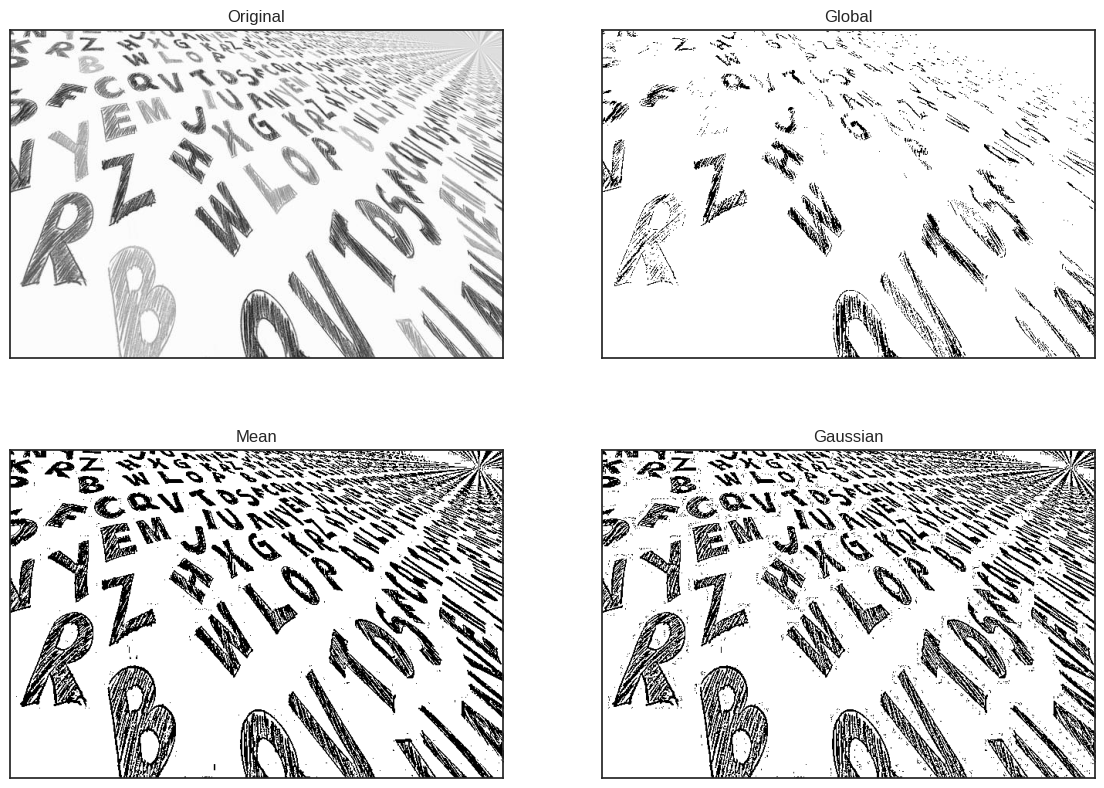

In [18]:
titles = ['Original', 'Global','Mean','Gaussian']
images = [img, th1,th2,th3]

plt.figure(figsize = (14,10))
for i in range(4):
  plt.subplot(2,2,i+1)
  plt.imshow(images[i], cmap='gray')
  plt.title(titles[i])
  plt.xticks([])
  plt.yticks([])

plt.show()

#Otsu의 이진화
Otsu의 이진화(Otsu’s Binarization)란 bimodal image에서 임계값을 자동으로 계산하는 것

임계값을 결정하는 가장 일반적인 방법은 trial and error 방식

bimodal image (히스토그램으로 분석하면 2개의 peak가 있는 이미지)의 경우는 히스토그램에서 임계값을 어느정도 정확히 계산 가능

cv2.threshold() 함수의 flag에 추가로 cv2.THRESH_OTSU 를 적용. 이때 임계값은 0으로 전달

In [19]:
files.upload()

Saving noise.jpg to noise.jpg


{'noise.jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00\x84\x00\x05\x05\x05\x05\x05\x05\x05\x06\x06\x05\x08\x08\x07\x08\x08\x0b\n\t\t\n\x0b\x11\x0c\r\x0c\r\x0c\x11\x1a\x10\x13\x10\x10\x13\x10\x1a\x17\x1b\x16\x15\x16\x1b\x17) \x1c\x1c )/\'%\'/9339GDG]]}\x01\x05\x05\x05\x05\x05\x05\x05\x06\x06\x05\x08\x08\x07\x08\x08\x0b\n\t\t\n\x0b\x11\x0c\r\x0c\r\x0c\x11\x1a\x10\x13\x10\x10\x13\x10\x1a\x17\x1b\x16\x15\x16\x1b\x17) \x1c\x1c )/\'%\'/9339GDG]]}\xff\xc2\x00\x11\x08\x01h\x02\x80\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x000\x00\x00\x03\x00\x03\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x02\x03\x04\x00\x01\x05\x06\x07\x08\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\xff\xda\x00\x0c\x03\x01\x00\x02\x10\x03\x10\x00\x00\x00\xf1\xa7\x80W!\xe1\xbc\xd5B\xf6"\x03\xa6p\xba\x00\x84\xe9\xa9\t;a\xb2\xd2\xc0\xd9l\xa21x\x96\x11\x82\x1a@\xdc\xc7\x93R$\x0e\xf6\xd2@\xa4\x00z\x1eNo0\x17\xb9\xcd\xed\x98Y\x1e\x11\xbd\xa0\x86\x

In [20]:
img = cv2.imread('noise.jpg',0)
img.shape

(360, 640)

In [21]:
ret1, th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
ret2, th2 = cv2.threshold(img,0,255,cv2.THRESH_BINARY + cv2.THRESH_OTSU)
blur = cv2.GaussianBlur(img,(5,5),0)
ret3, th3 = cv2.threshold(img,0,255,cv2.THRESH_BINARY + cv2.THRESH_OTSU)

In [26]:
images = [img,0,th1,img,0,th2,blur,0,th3]
titles = ['Original Image','Histogram','Global Thresholding','Original Image','Histogram','Otsus Thresholding','Gaussian filtered Image','Histogram','Otsus Thresholding']

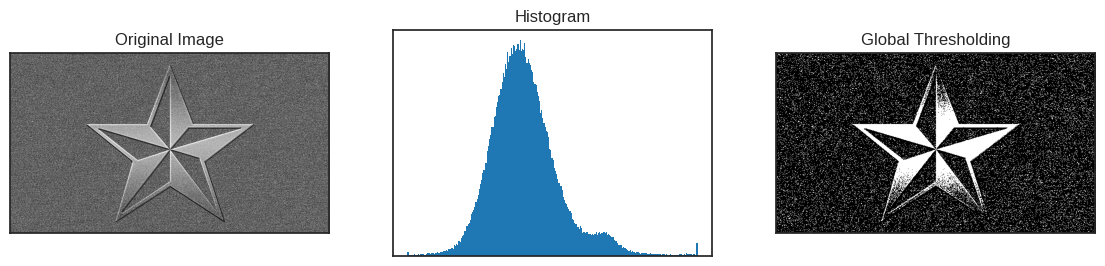

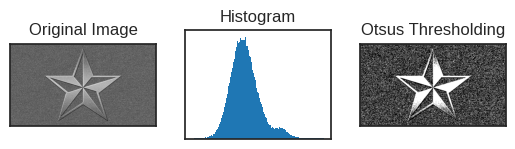

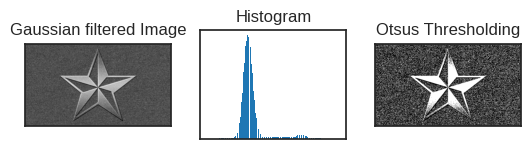

In [27]:
plt.figure(figsize = ((14,10)))
for i in range(3):
  plt.subplot(3,3,i*3+1)
  plt.imshow(images[i*3], cmap = 'gray')
  plt.title(titles[i*3])
  plt.xticks([]), plt.yticks([])

  plt.subplot(3,3,i*3+2)
  plt.hist(images[i*3].ravel(), 256)
  plt.title(titles[i*3+1])
  plt.xticks([]), plt.yticks([])

  plt.subplot(3,3,i*3+3)
  plt.imshow(images[i*3+2], cmap = 'gray')
  plt.title(titles[i*3+2])
  plt.xticks([]), plt.yticks([])

  plt.show()